# Name : SNEHA  VALAROUTU

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# loading the dataset

In [2]:
iris =  pd.read_csv('iris.csv') # loading the dataset

In [3]:
iris.shape # shape of the dataset

(150, 6)

In [4]:
iris.columns # columns of the dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.drop(["Id"],axis=1,inplace=True)    # dropped

In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Data Visualisation

#  2-D scatter plot

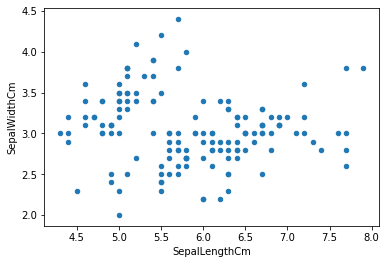

In [10]:
# plotting 2-D scatter plot betwwen sepal Length and sepal width

iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()

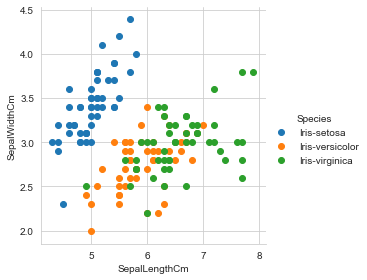

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

- versicolor and virginica cannot be separated easily as they overlap.
- setosa can be easily identified.

# 3D Scatter plot

- pair plot

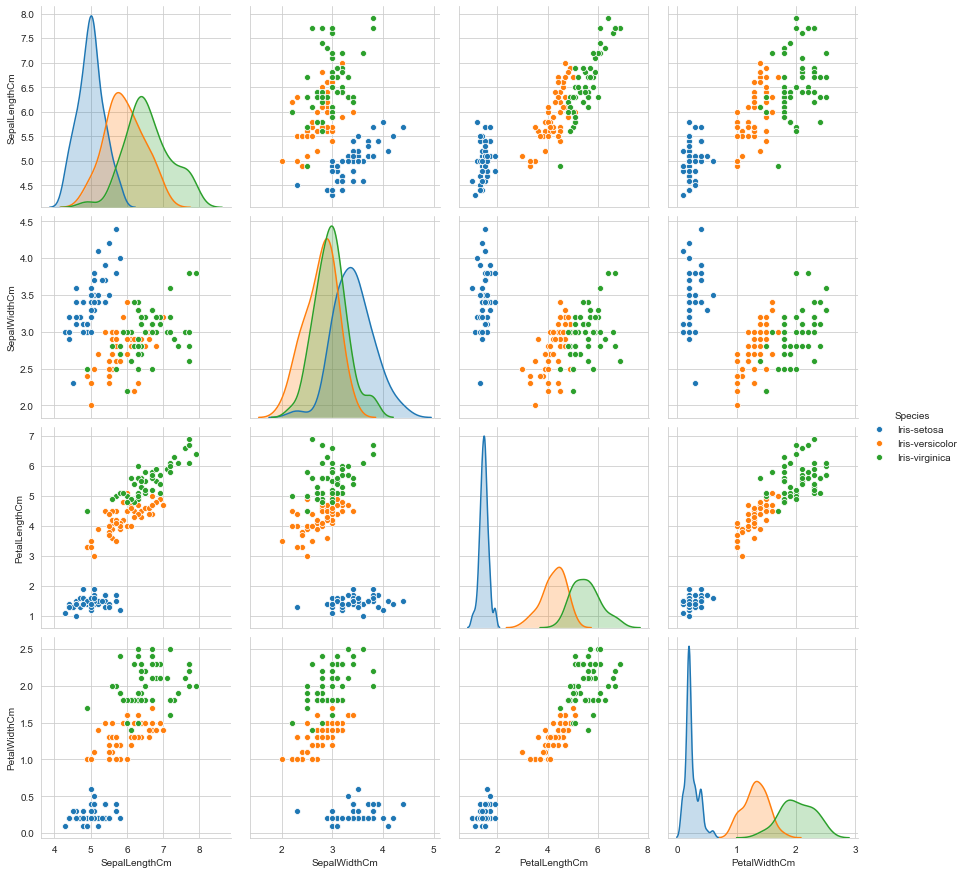

In [12]:
# plotting 3D- scatter plot

sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size=3);
plt.show()

- petal width and petal length are helpful.

# Clustering

## K-Means Clustering

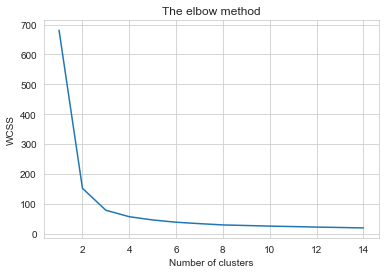

In [13]:
# Finding the optimum number of clusters for k-means classification

features = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

This indicates k = 3

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

In [15]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


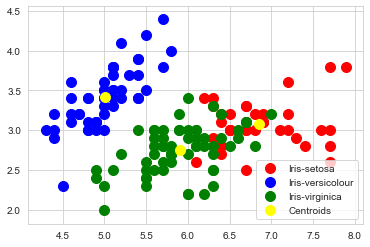

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Hierarchical clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=99)

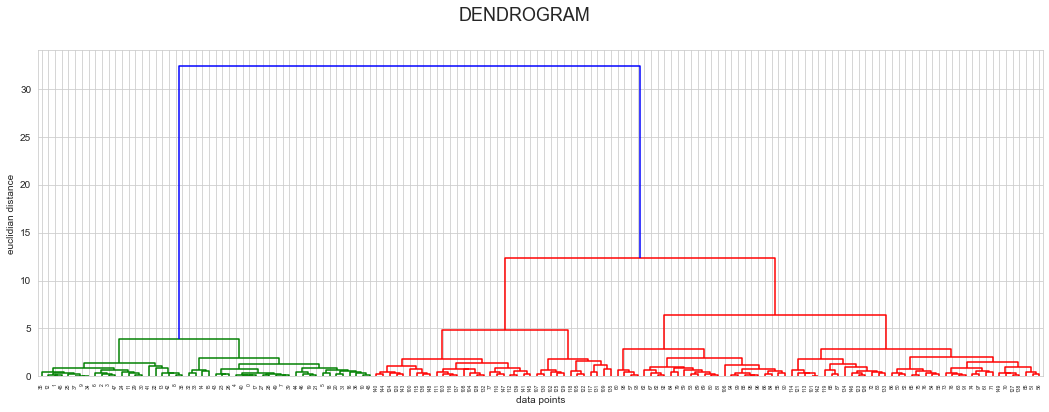

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(features,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

- By seeing the dendorgram we can say 2 or 3 clusters.

In [19]:
hc = AgglomerativeClustering(n_clusters=3)
y_hc = hc.fit_predict(features)

In [20]:
print(hc.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


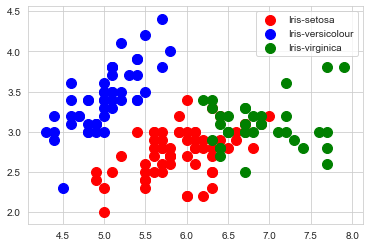

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(features[y_hc == 0, 0], features[y_hc == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_hc == 1, 0], features[y_hc == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_hc == 2, 0], features[y_hc == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.legend()

# Principal Component Analysis

In [22]:

x = iris.drop('Species', 1)
y = iris['Species']

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =42)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
from sklearn.decomposition import PCA

pca =PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

 PCA contains explained_variance_ratio_ which returns the variance cause by each of the principal components.

In [26]:
variance = pca.explained_variance_ratio_

In [27]:
variance

array([0.72317687, 0.23215265, 0.03983465, 0.00483583])

Its can be seen that first pricipal component has 72.31% variance, second principal component has 23.21% variance. We can say that the maximum classification information is captured in the first two princpal components.

considering all components

In [28]:
pca = PCA(n_components =4, svd_solver='full')
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 2, random_state =42)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
y_pred1 = rfc.predict(x_test)

In [31]:
y_pred1

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

## Performance Evaluation

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print('Accuracy', accuracy_score(y_test, y_pred1))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]
Accuracy 0.9333333333333333


- consider 3 components

In [34]:
pca = PCA(n_components =3, svd_solver='full')
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 2, random_state =0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
y_pred2 = rfc.predict(x_test)

In [37]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print('Accuracy', accuracy_score(y_test, y_pred2))

[[10  0  0]
 [ 0  8  1]
 [ 0  4  7]]
Accuracy 0.8333333333333334


Considering 2 components

In [38]:
pca = PCA(n_components =2, svd_solver='full')
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 2, random_state =0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
y_pred3 = rfc.predict(x_test)

In [41]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print('Accuracy', accuracy_score(y_test, y_pred3))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]
Accuracy 0.9333333333333333


Considering one component

In [42]:
pca = PCA(n_components =1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 2, random_state =0)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
y_pred4 = rfc.predict(x_test)

In [45]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print('Accuracy', accuracy_score(y_test, y_pred4))

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
Accuracy 0.9


Best accuracy is obtained for 2 principal components.